In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
# load data from prior iterations
comps_all, spectra_all = [], []
for i in range(8):
    comps = np.load("../data/comps_%d.npy"%i)
    spectra = np.load("../data/spectra_%d.npy"%i)
    comps_all.append(comps)
    spectra_all.append(spectra)

In [3]:
comps_all = np.concatenate(comps_all)
spectra_all = np.concatenate(spectra_all)

In [4]:
# load data from latest synthesis
spectra_072424 = pd.read_excel("./UVVis/2D_repeat_NO_redisperse_0724.xlsx", engine='openpyxl')
water = spectra_072424["G9"].to_numpy()
volumes = pd.read_csv("./volumes_repeat_071724.csv")
times = pd.read_csv("./times_repeat_071724.csv")
wavelength = spectra_072424["Wavelength"].to_numpy()

comps_072424 = np.stack((volumes.values[:,-1], times.values[:,-1])).T
spectra_072424_nobkg = (spectra_072424.iloc[:,1:-1].values-water[:,None]).T

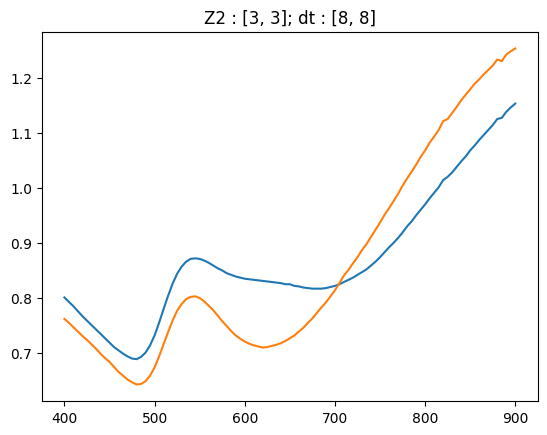

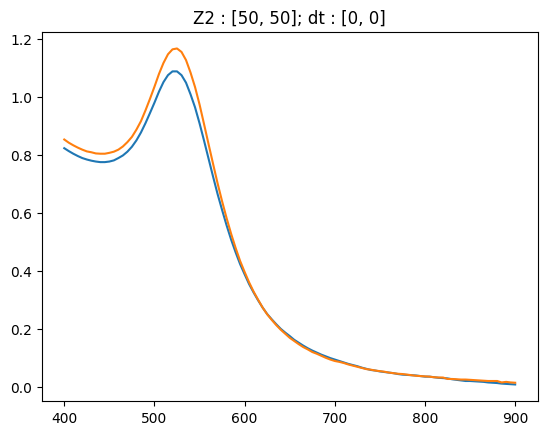

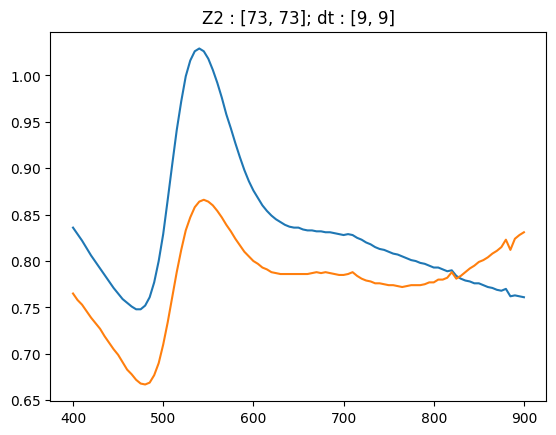

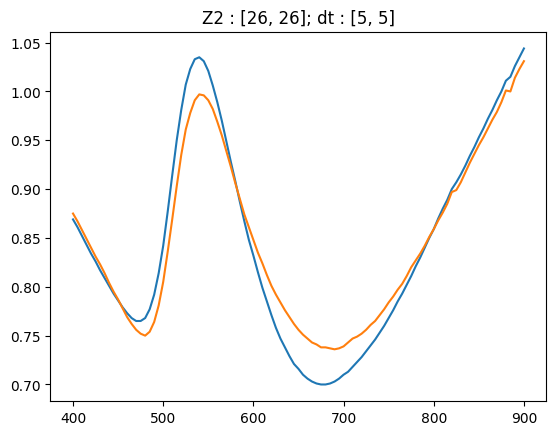

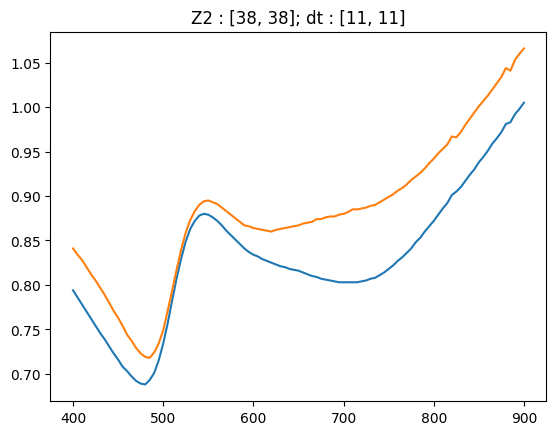

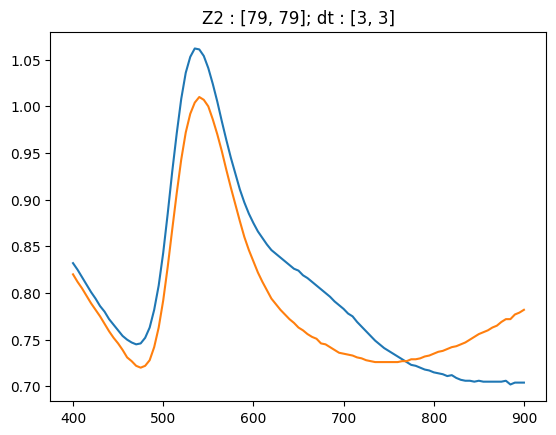

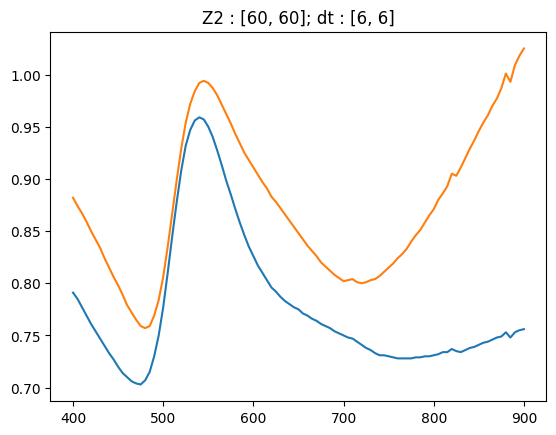

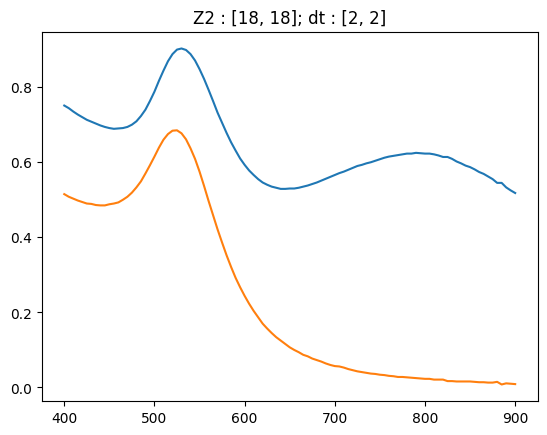

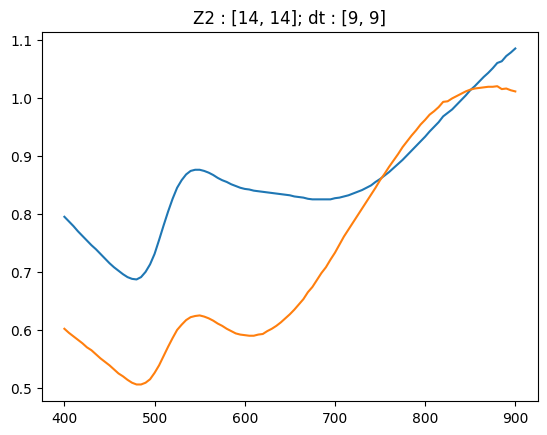

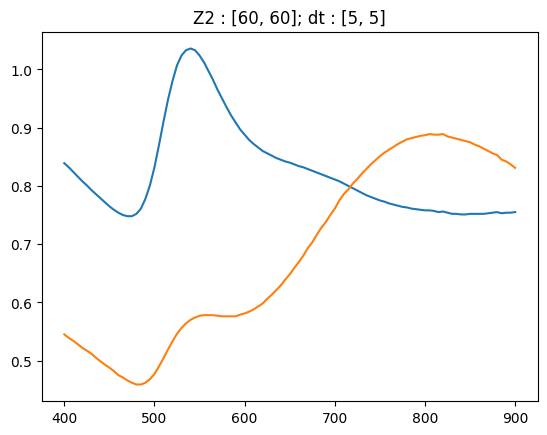

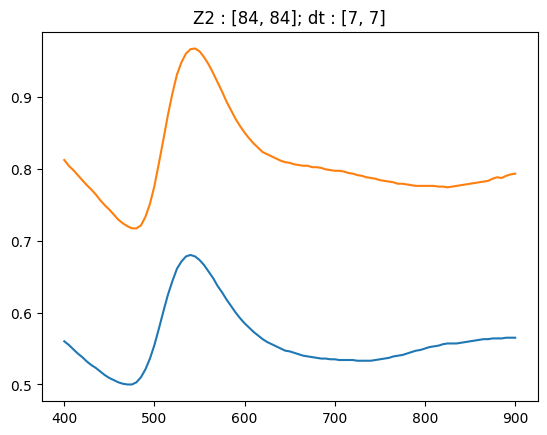

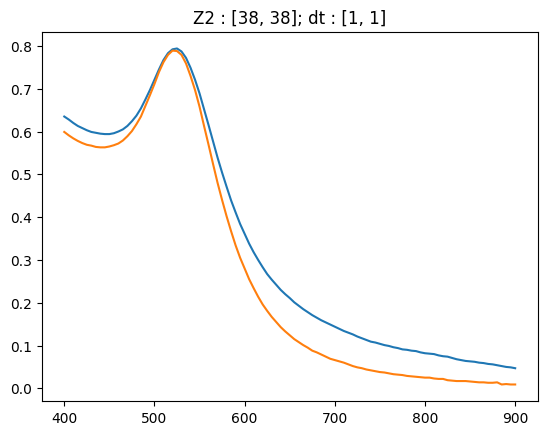

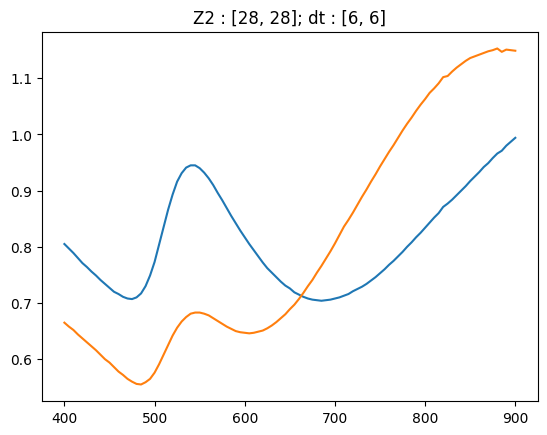

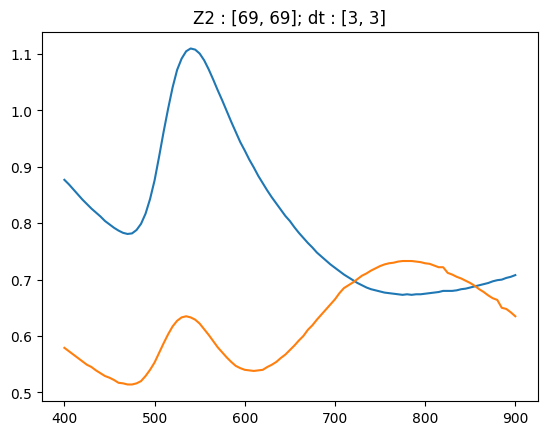

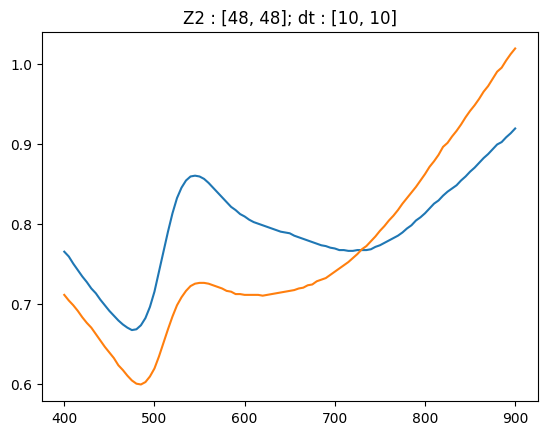

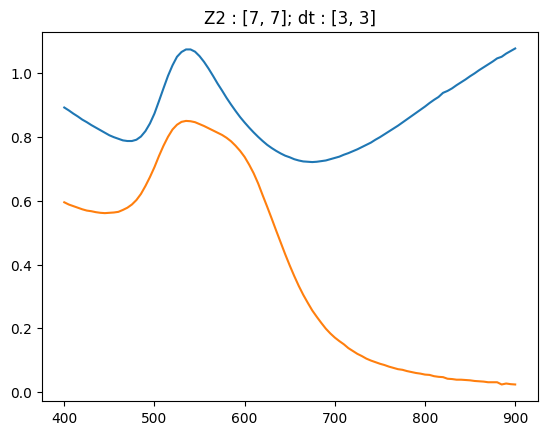

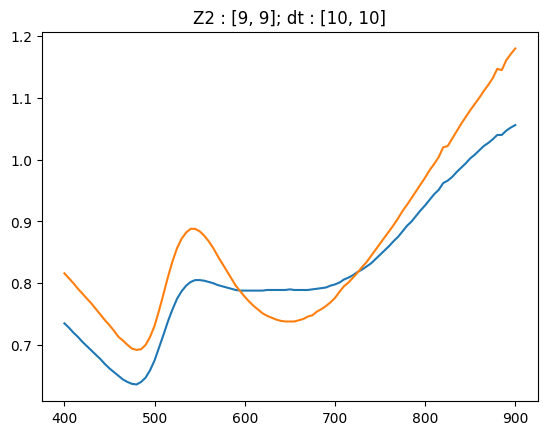

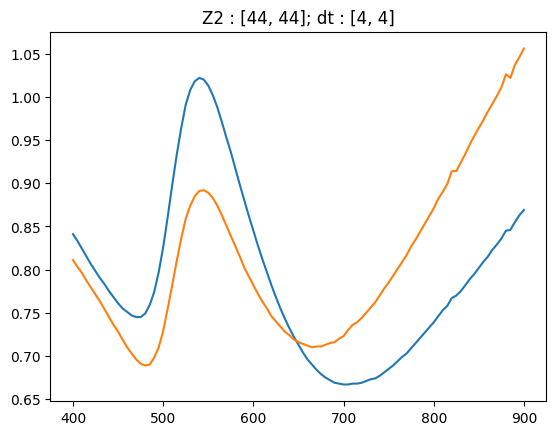

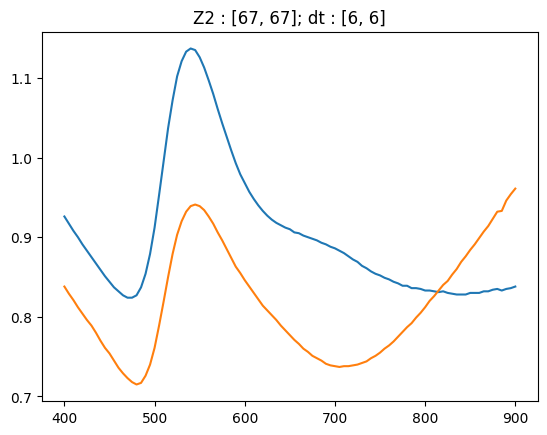

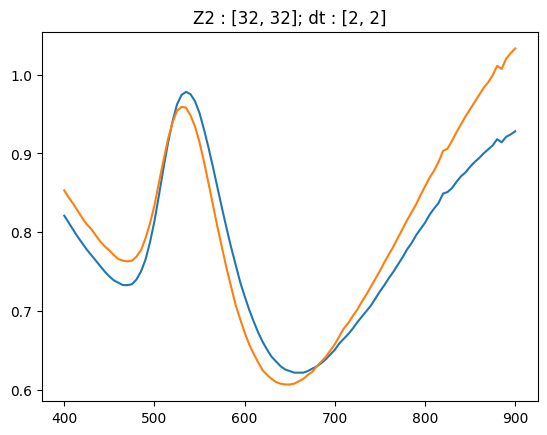

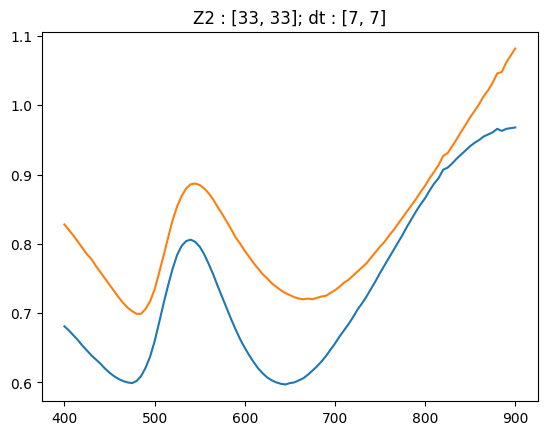

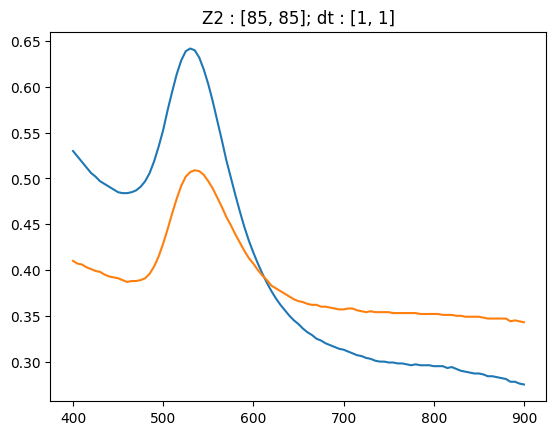

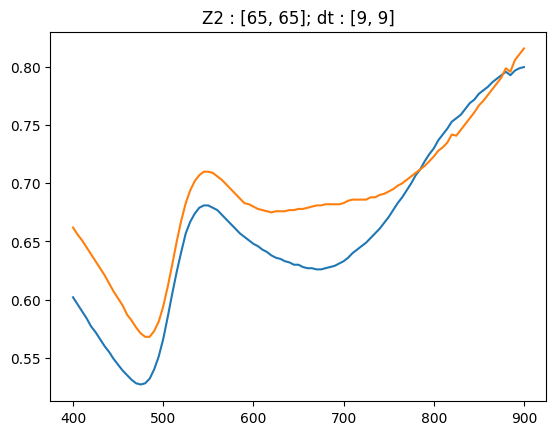

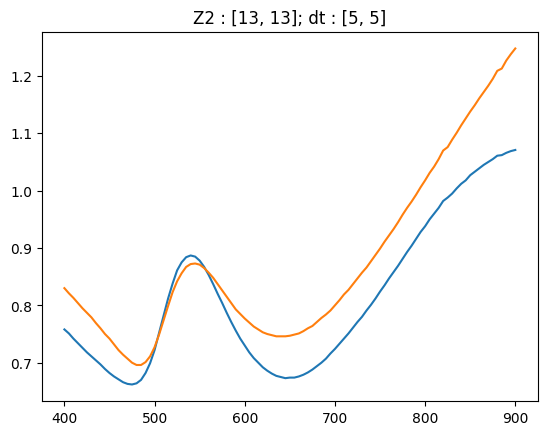

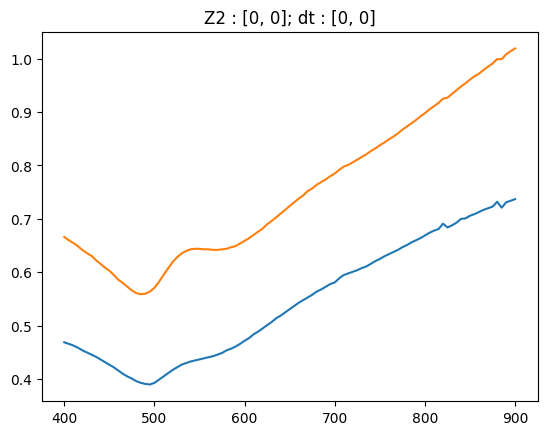

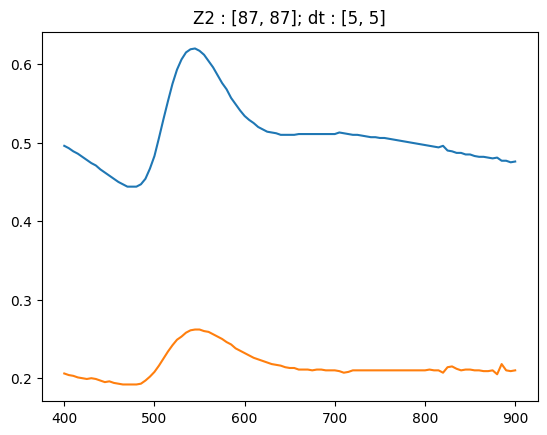

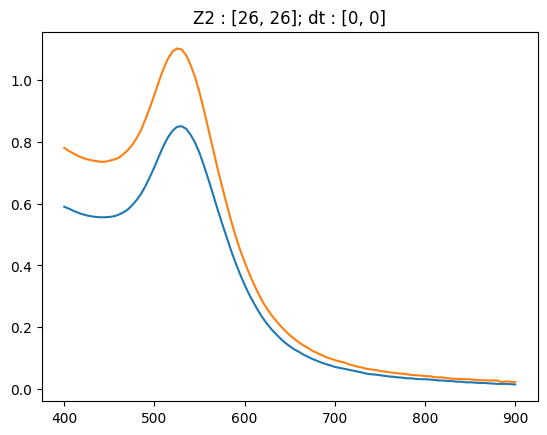

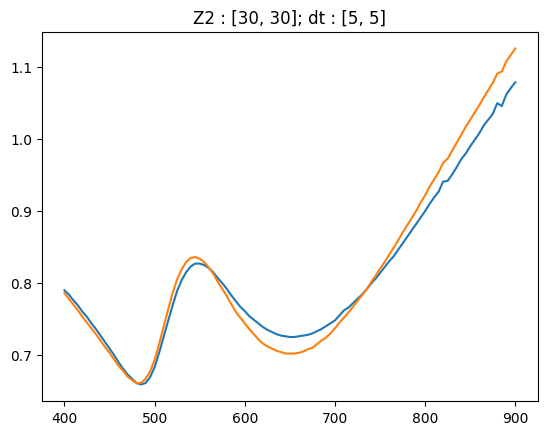

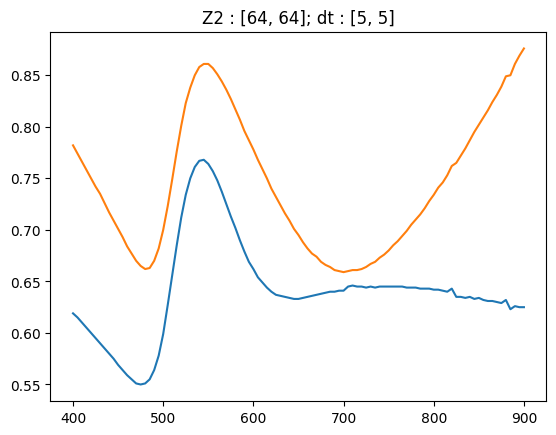

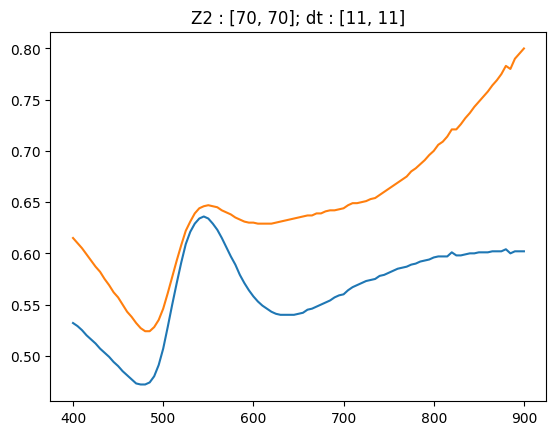

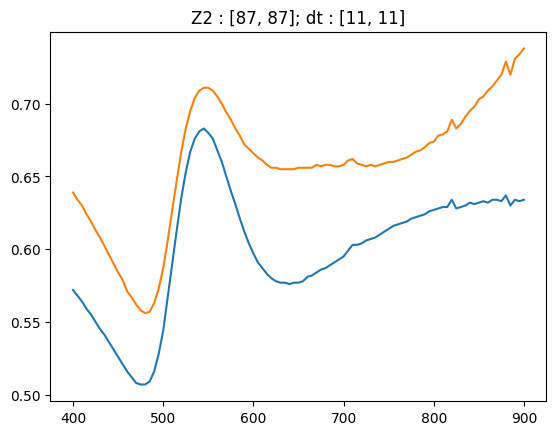

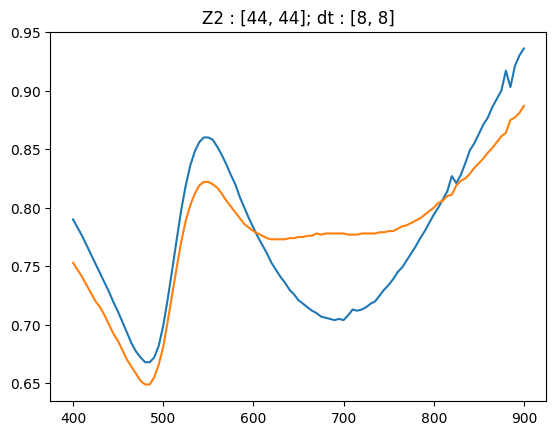

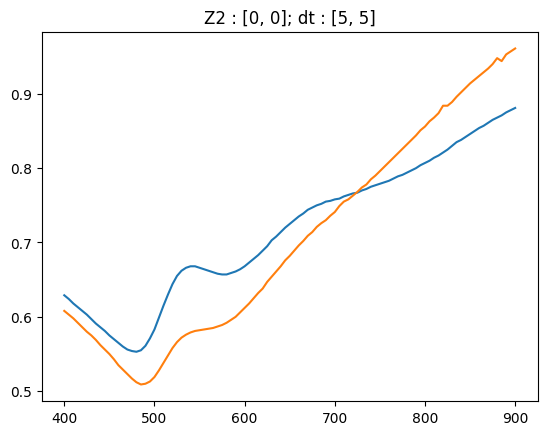

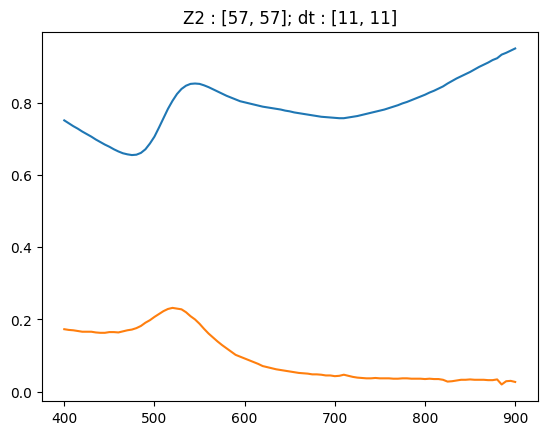

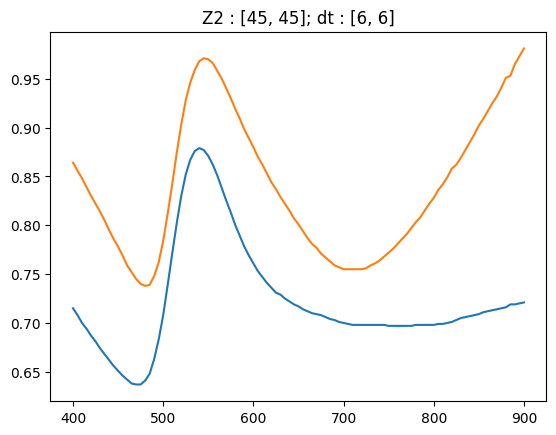

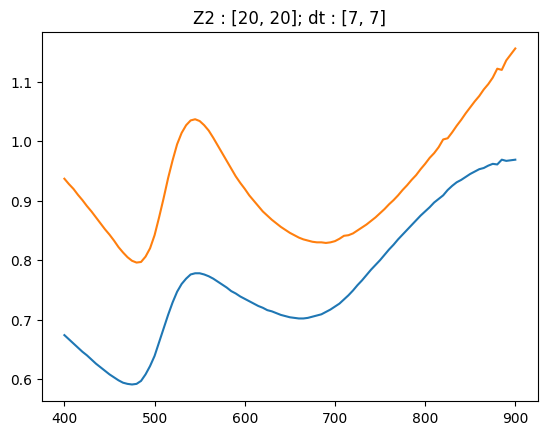

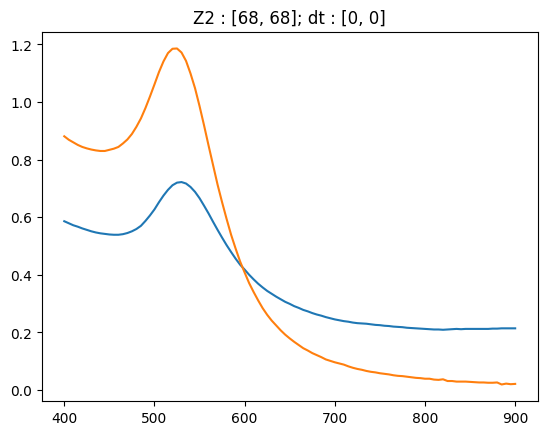

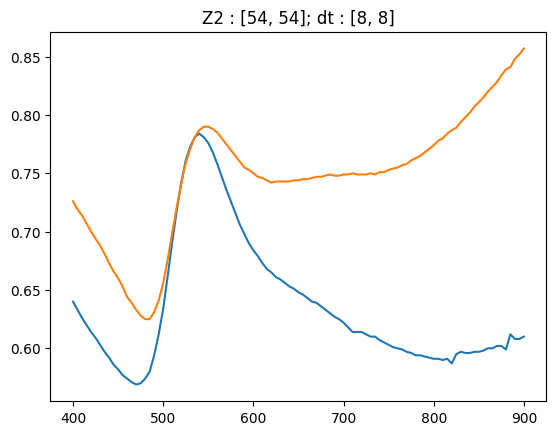

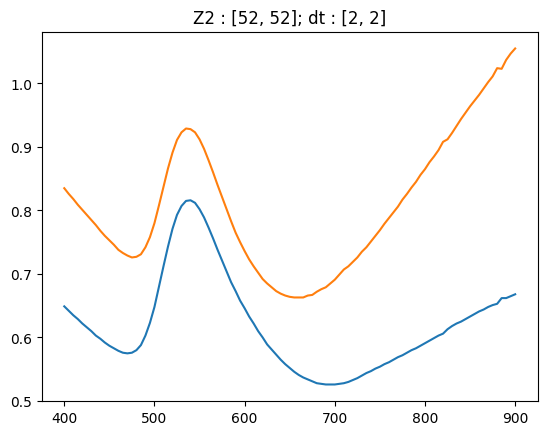

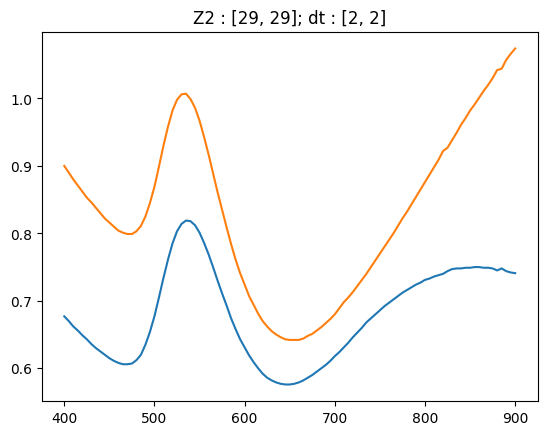

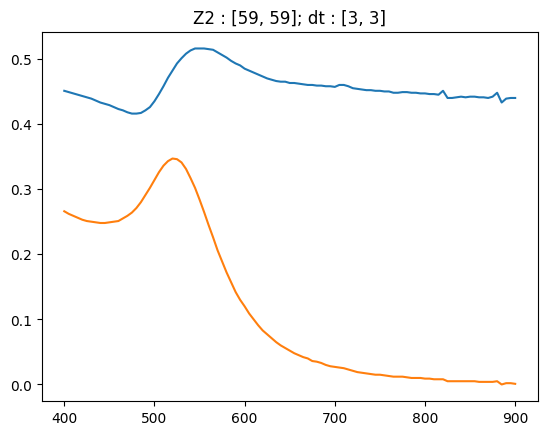

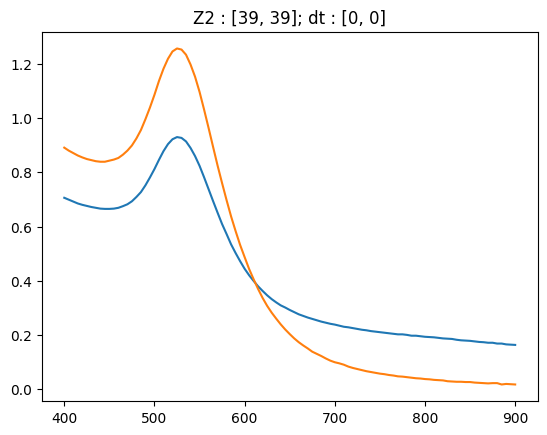

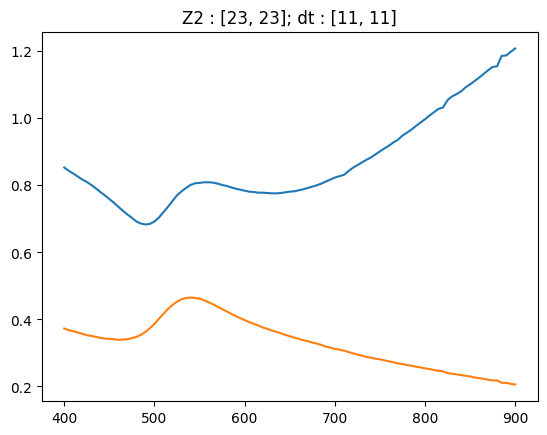

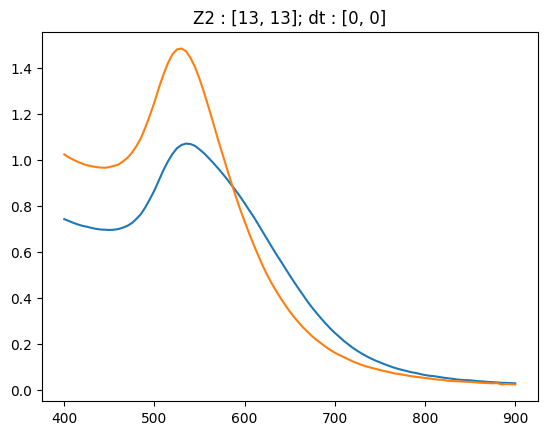

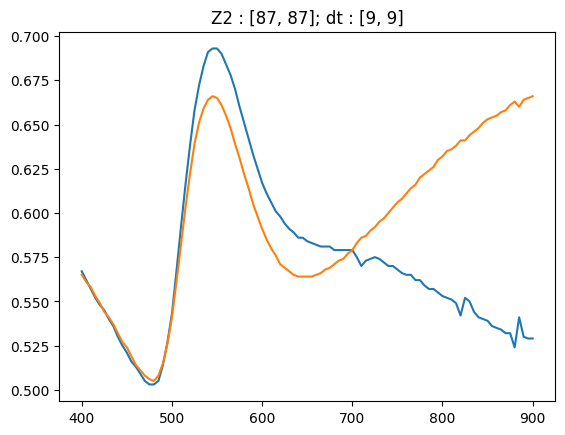

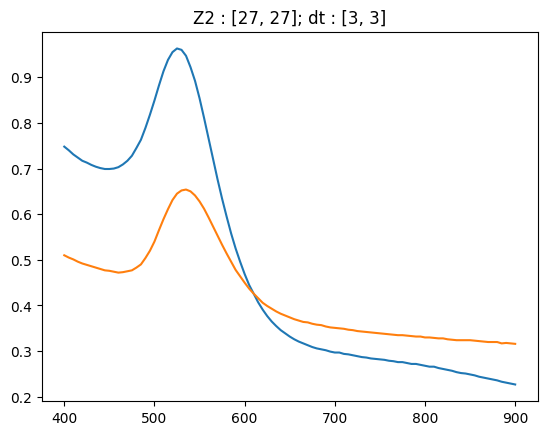

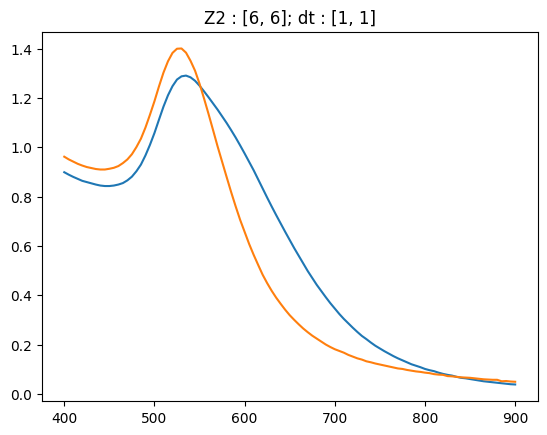

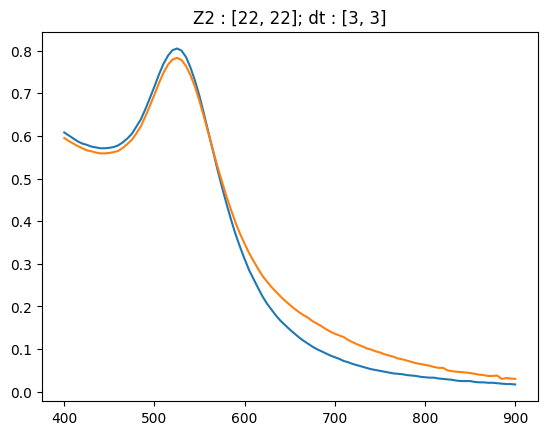

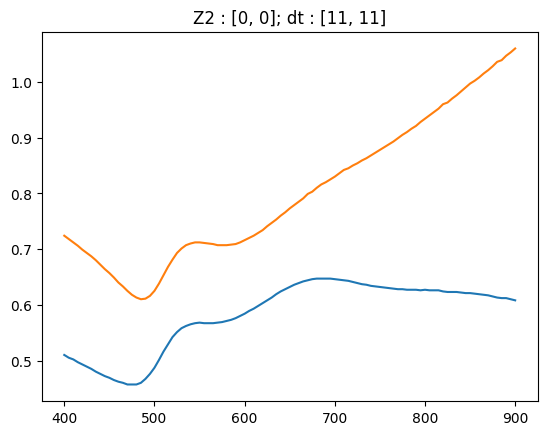

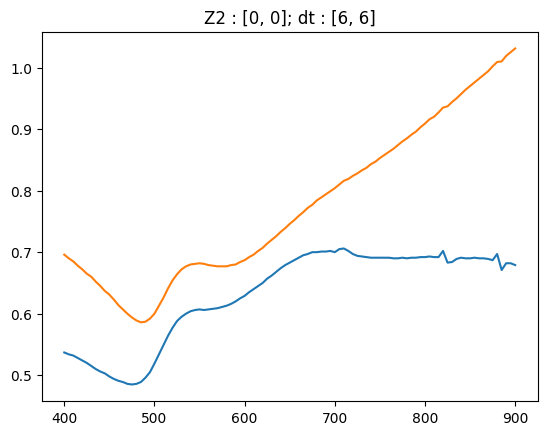

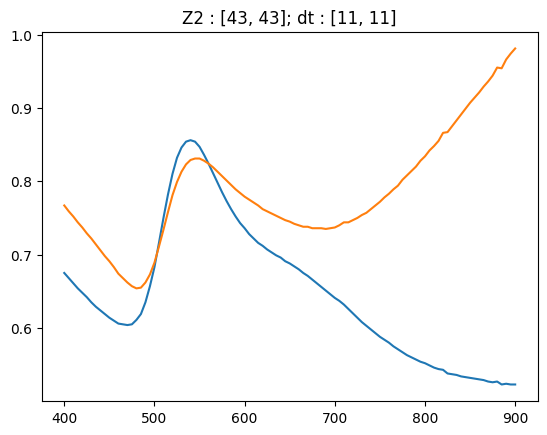

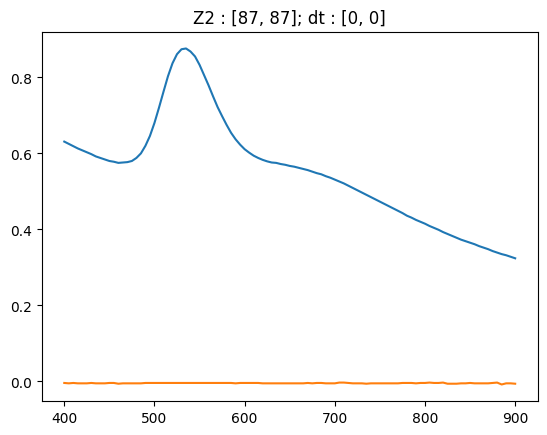

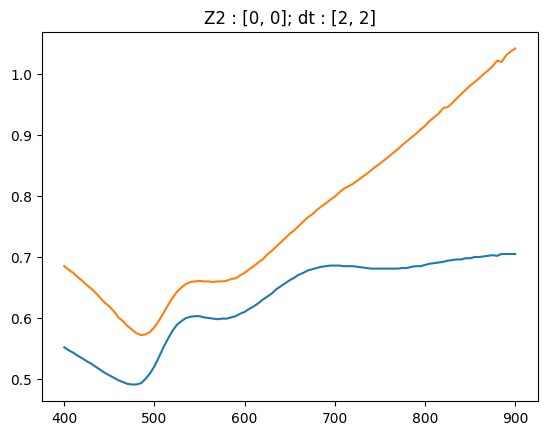

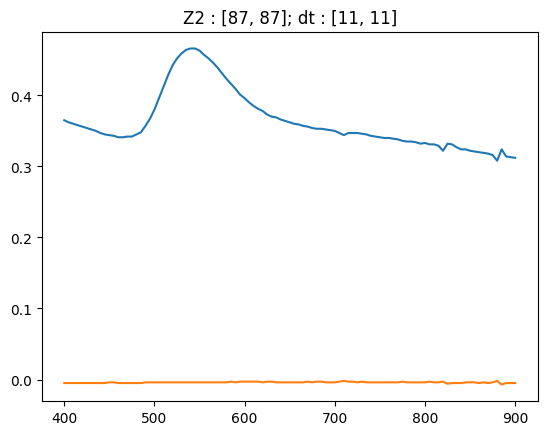

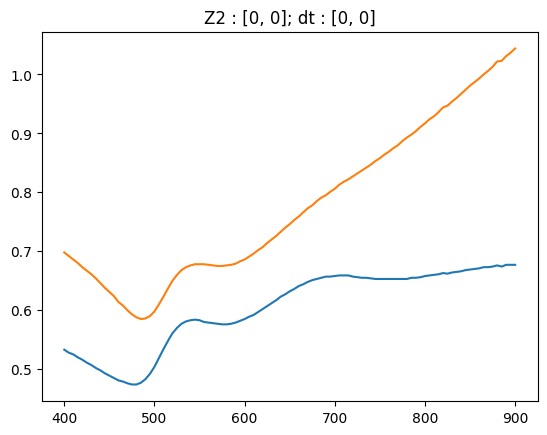

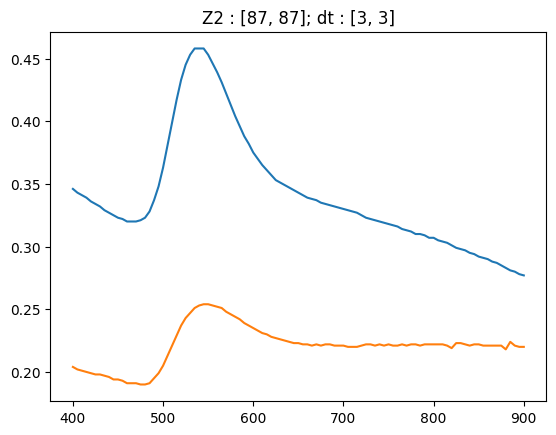

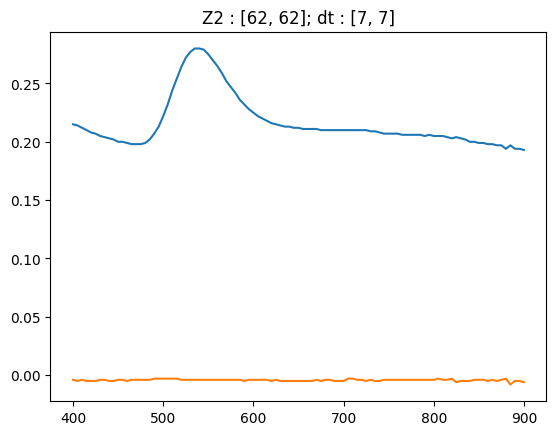

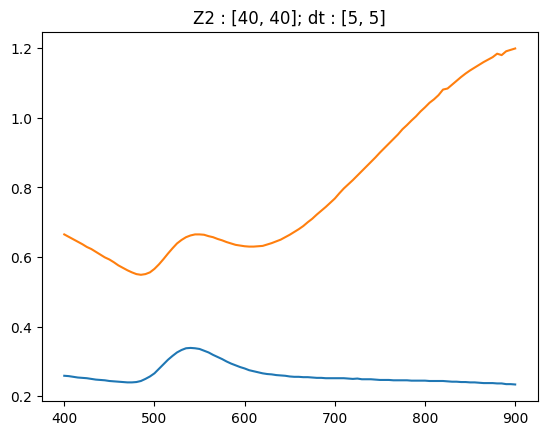

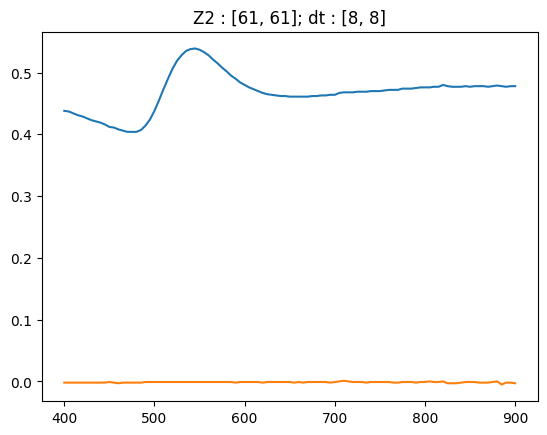

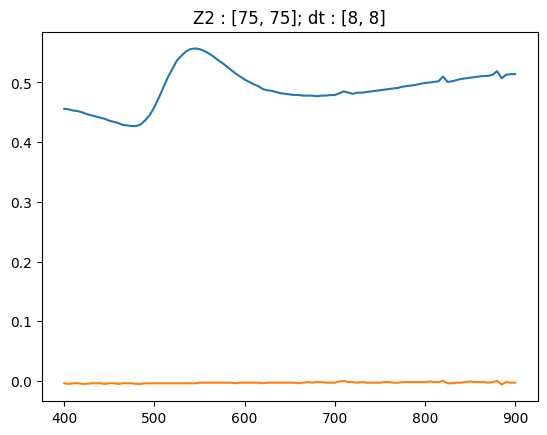

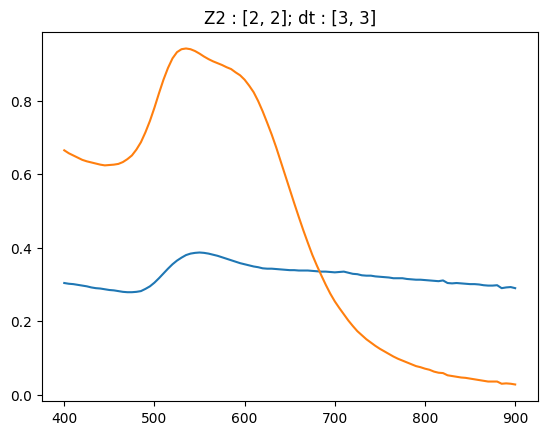

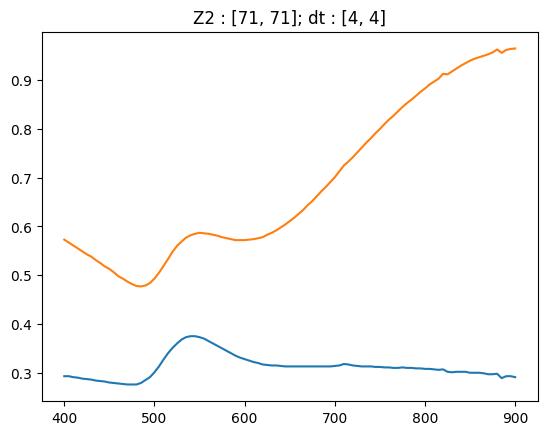

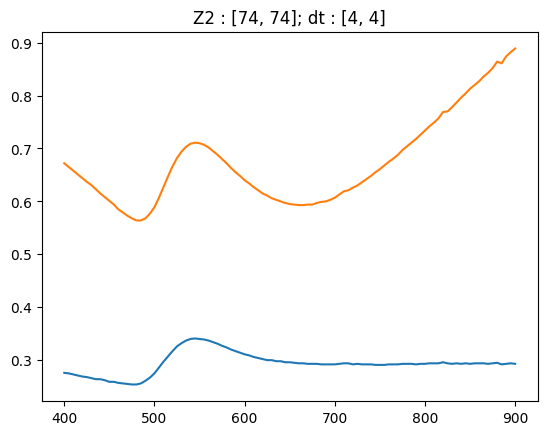

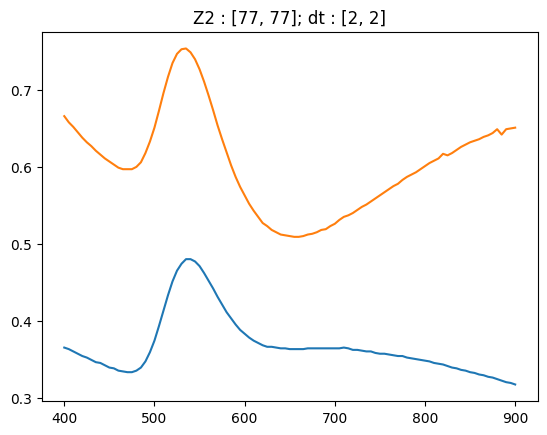

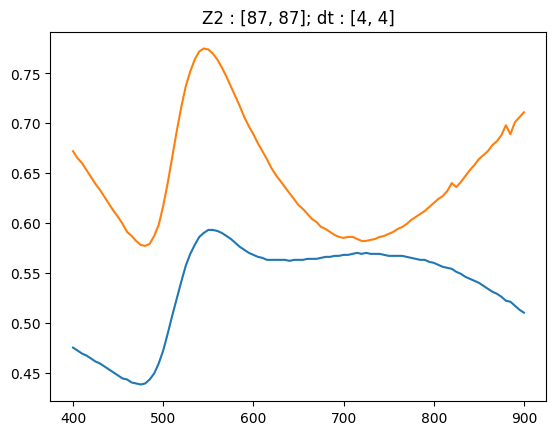

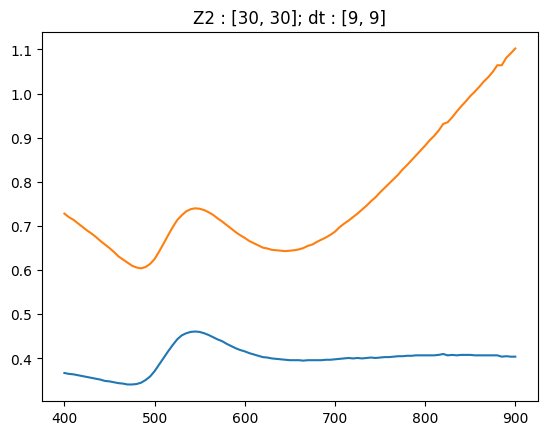

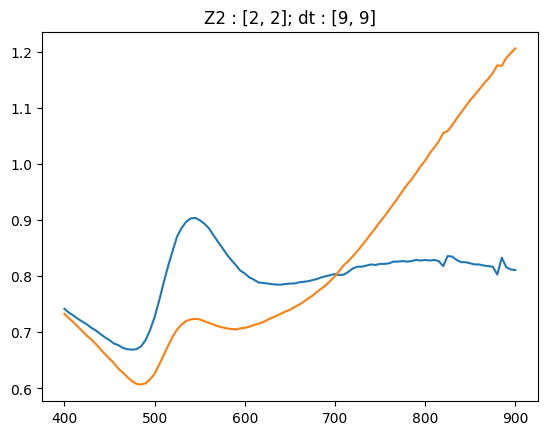

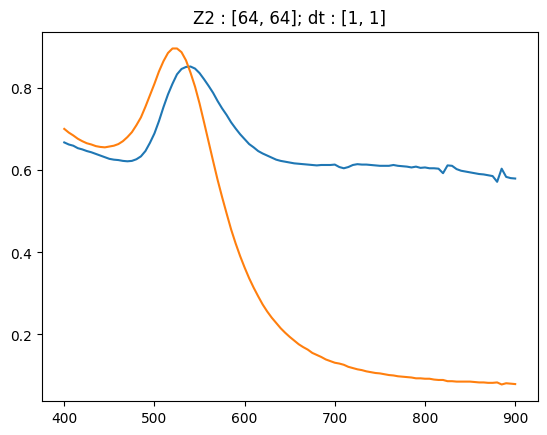

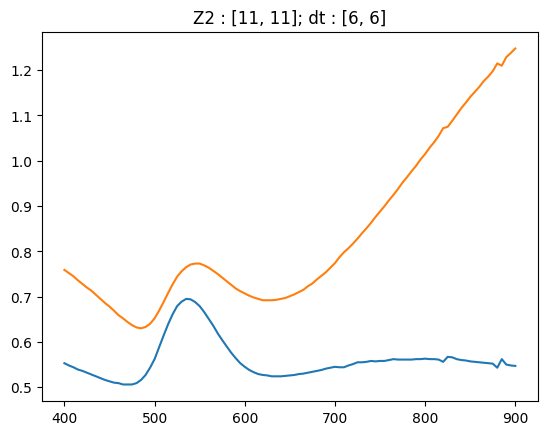

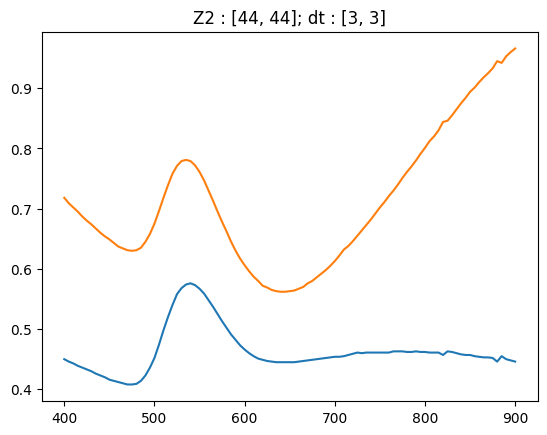

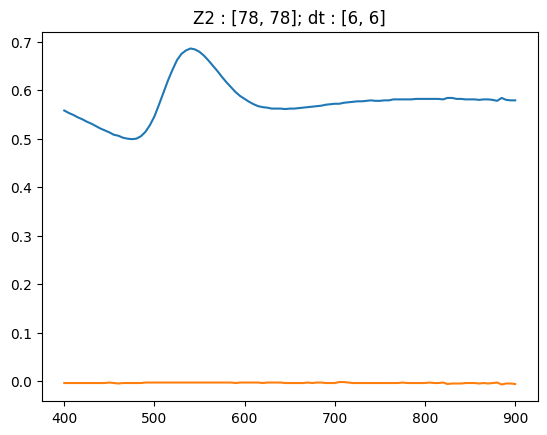

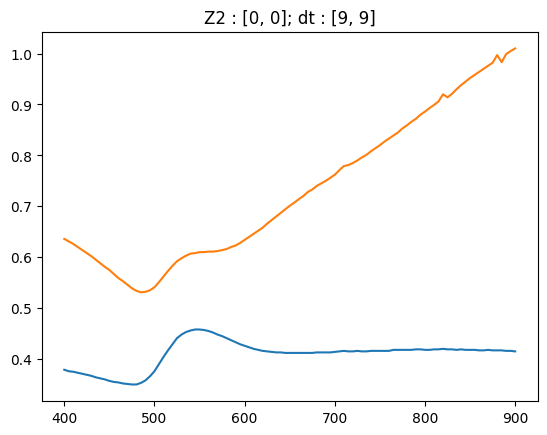

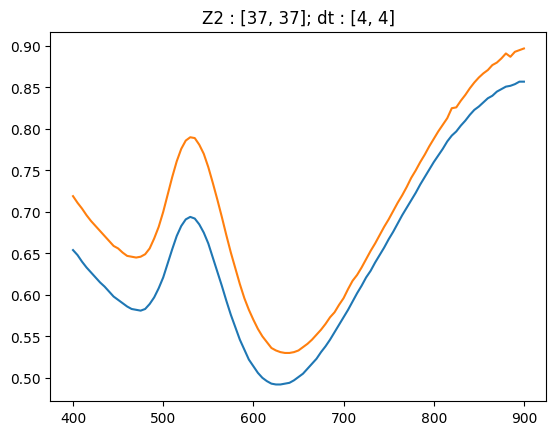

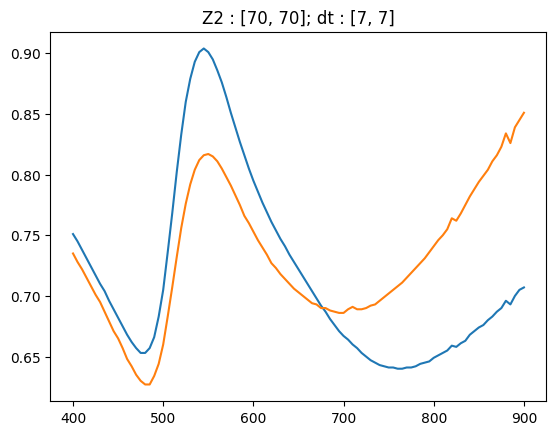

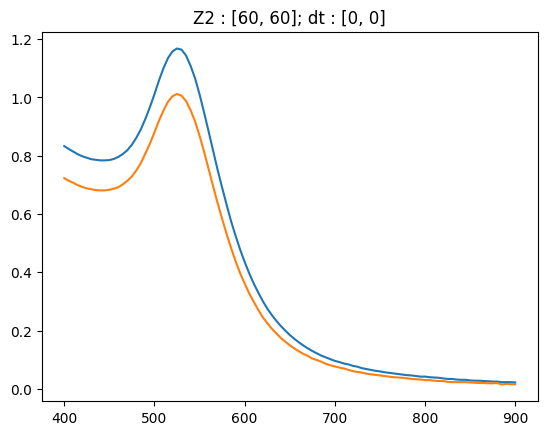

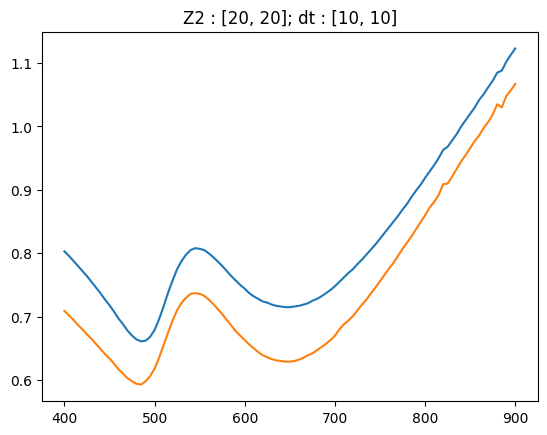

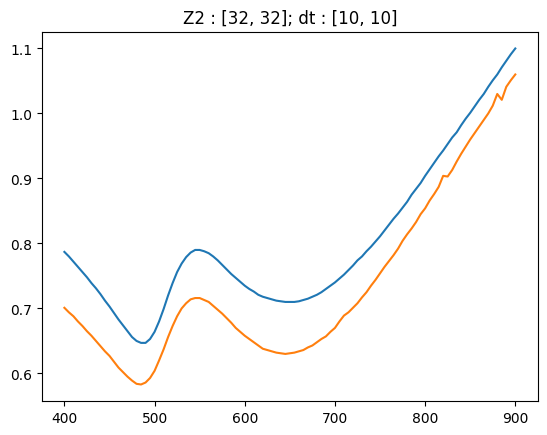

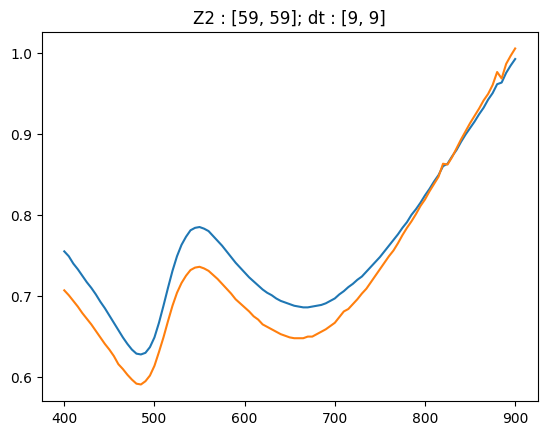

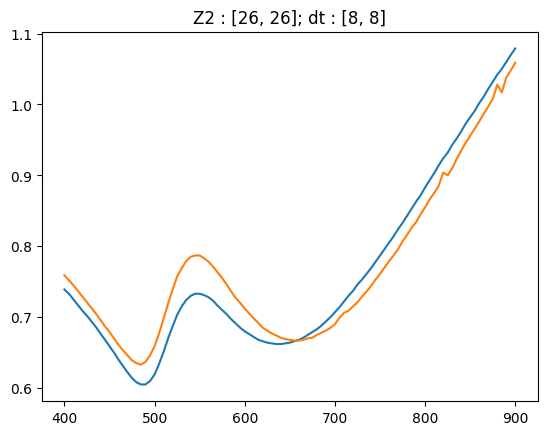

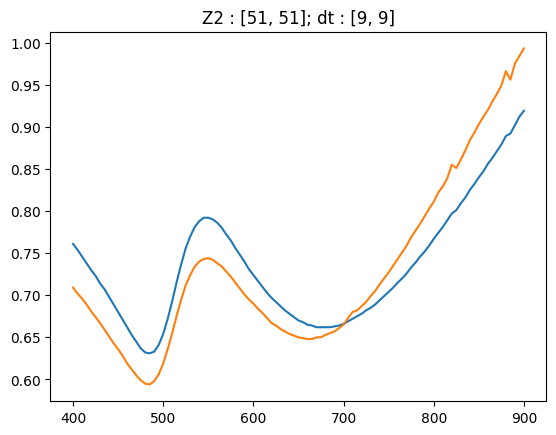

In [5]:
for i in range(80):
    fig, ax = plt.subplots()
    ax.plot(wavelength, spectra_all[i,:])
    ax.plot(wavelength, spectra_072424_nobkg[i,:])
    ax.set_title("Z2 : [%d, %d]; dt : [%d, %d]"%(round(comps_all[i, 0]), 
                                                 comps_072424[i,0],
                                                 round(comps_all[i, 1]), 
                                                 comps_072424[i,1],
                                                 )
                                                 )
    plt.show()

In [6]:
spectra_train = []
for i in range(80):
    spectra_new = spectra_072424_nobkg[i,:]
    spectra_old = spectra_all[i,:]
    if (spectra_new<0.01).all():
        spectra_train.append(spectra_old)
    else:
        spectra_train.append(spectra_new)

spectra_train = np.asarray(spectra_train)

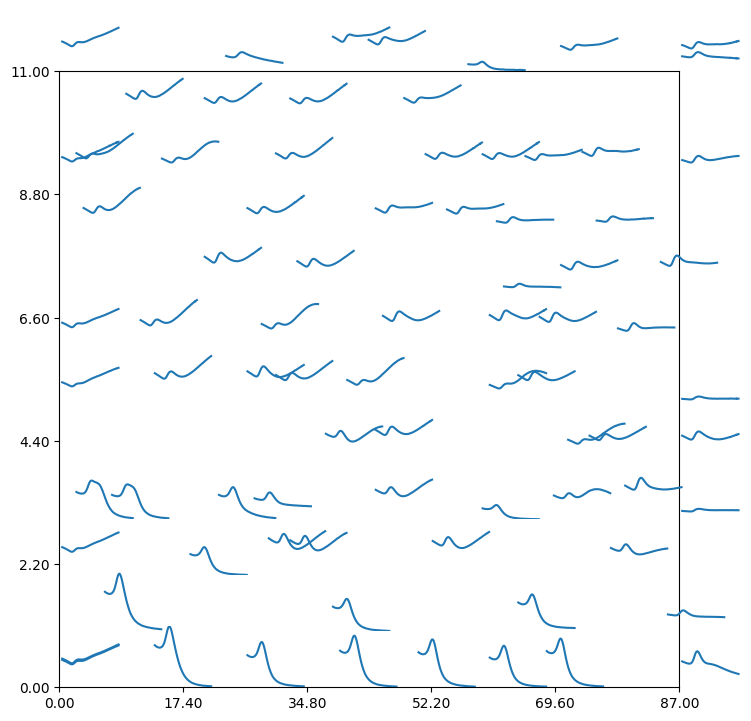

In [7]:
import sys 
sys.path.append("/Users/pozzolabadmin/Documents/codebase/experiments/peptide_phase_mapping")
from utils import plot_phasemap

bounds = np.asarray([(0.0, 87.0), (0.0,11.0)]).T 
fig, ax = plt.subplots(figsize=(8,8))
plot_phasemap(bounds, ax, comps_072424, spectra_train, limits=[0,1.5])

In [8]:
# save the train data
np.save("./comps_train.npy", comps_072424)
np.save("./spectra_train.npy", spectra_train)
np.save("./wav.npy", wavelength)